In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import pickle

In [4]:
# error sol on 'https://forums.fast.ai/t/oserror-image-file-is-truncated-38-bytes-not-processed/30806'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
DIRECTORY = r'F:\IMP DOCUMENT\projects\ISRO-SCL-MEIT-Project\Vehicle'
CATEGORIES = ["Auto","Bus","Car","Tempo","Tractor","Truck"]

In [5]:
IMG_SIZE = 100 

data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = plt.imread(img_path)
        img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])
        


In [7]:
random.shuffle(data)

In [8]:
X=[]
Y=[]
for features ,label in data:
    X.append(features)
    Y.append(label)
li = []
len(X),len(Y)



(5264, 5264)

In [9]:
len(X),len(Y)

(5264, 5264)

In [10]:
for i in range(len(X)):
    if X[i].shape == (IMG_SIZE,IMG_SIZE,3) :
        li.append(X[i])
    else:
        #  remove elements from the list
        del Y[i]
len(Y),len(li)

4156


In [18]:
X = np.array(li)
Y = np.array(Y)


In [21]:
pickle.dump(X,open('Xnew2.pkl','wb'))
pickle.dump(Y,open('Ynew2.pkl','wb'))


In [5]:
X = pickle.load(open('Xnew2.pkl','rb'))
Y = pickle.load(open('Ynew2.pkl','rb'))

In [7]:
X=X/255
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128,input_shape = X_train.shape[1:], activation='relu'))
model.add(Dense(6,activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# print(model.summary())

Epoch 1/100
134/134 [==============================] - 54s 371ms/step - loss: 1.6709 - accuracy: 0.3046 - val_loss: 1.6822 - val_accuracy: 0.2722
Epoch 2/100
134/134 [==============================] - 46s 346ms/step - loss: 1.6589 - accuracy: 0.3055 - val_loss: 1.6848 - val_accuracy: 0.2722
Epoch 3/100
134/134 [==============================] - 43s 318ms/step - loss: 1.6596 - accuracy: 0.3055 - val_loss: 1.6791 - val_accuracy: 0.2722
Epoch 4/100
134/134 [==============================] - 47s 352ms/step - loss: 1.6515 - accuracy: 0.3074 - val_loss: 1.6367 - val_accuracy: 0.2743
Epoch 5/100
134/134 [==============================] - 42s 316ms/step - loss: 1.5616 - accuracy: 0.3602 - val_loss: 1.5153 - val_accuracy: 0.4072
Epoch 6/100
134/134 [==============================] - 47s 351ms/step - loss: 1.4612 - accuracy: 0.4313 - val_loss: 1.4119 - val_accuracy: 0.4831
Epoch 7/100
134/134 [==============================] - 48s 357ms/step - loss: 1.3786 - accuracy: 0.4714 - val_loss: 1.4189 -

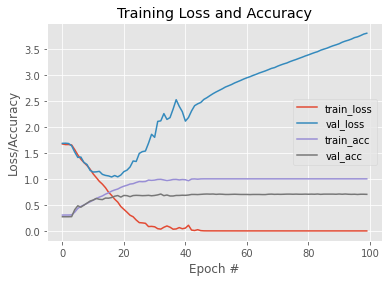

In [8]:

final = model.fit(X_train, y_train, epochs=100,validation_split=0.1)
# model.save('Vehicle_aug1.h5')
# plot the training loss and accuracy
N = 100
plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, N), final.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), final.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), final.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), final.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
# plt.savefig("CNN_Model_aug1.png") 